<a href="https://colab.research.google.com/github/cvs2010/udemyDeepLearning/blob/main/udemydeeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GoogleColab + Redes Neurais

In [121]:
import numpy as np

A partir daqui vamos estudar as TransferFunctions - Funções de ativação - [Keras.io](https://keras.io/activations)<br><br>
As funções de ativação são utilizadas em redes neurais artificiais para introduzir uma não-linearidade nos valores de saída de cada neurônio. Cada neurônio de uma rede neural recebe entradas, realiza uma combinação linear dessas entradas e, em seguida, aplica uma função de ativação não-linear para gerar sua saída.

As funções de ativação são importantes porque permitem que as redes neurais aprendam a modelar relações não-lineares entre as entradas e as saídas. Sem uma função de ativação não-linear, a rede neural seria apenas uma combinação linear de seus inputs, o que não seria suficiente para resolver muitos problemas complexos de aprendizado de máquina.

Algumas das funções de ativação mais comuns são:

Sigmoid: A função sigmoid é definida como f(x) = 1 / (1 + exp(-x)). Ela mapeia qualquer valor de entrada para um valor entre 0 e 1. É usada em redes neurais para classificação binária.

ReLU (Rectified Linear Unit): A função ReLU é definida como f(x) = max(0, x). Ela retorna 0 para valores de entrada negativos e o próprio valor de entrada para valores positivos. É uma das funções de ativação mais usadas, principalmente em redes neurais profundas.

Tanh (tangente hiperbólica): A função tanh é definida como f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x)). Ela mapeia valores de entrada para um intervalo entre -1 e 1, e é usada em redes neurais para classificação binária.

Softmax: A função Softmax é definida como exp(xi) / sum(exp(xj)) para todos os valores de j. É usada em redes neurais para classificação multiclasse, pois retorna probabilidades normalizadas que somam 1 para cada classe.

In [122]:
# Transfer Function - function that shows result 1 or 0 only, for numbers greater than or equal to 0 the result will be 1,
# for negative numbers (less than 0) the result will be 0
# Try to change the value of the function testTranferFunction = stepfunction(x) ,
# with 'x' representing a positive or negative number and see the result by running the cell

def stepfunction(soma):
  if(soma >= 1):
    return 1
  else:
    return 0

testTranferFunction = stepfunction(33);
print(testTranferFunction)

1


Função Sigmóide - [Wikipedia Sigmoide Function](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_sigmoide)

<br>


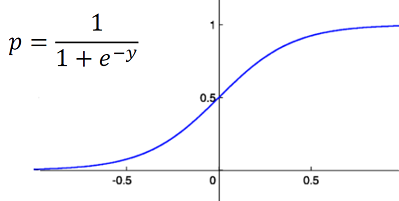

In [165]:
# Sigmoid Function - In MATLAB the sigmf function has two sigmoid setting values.
# The first indicates the degree of slope of the curve, while the second indicates the midpoint of the curve, i.e,
# for which value of x the sigmoid will assume value 0.5 on the y-axis (center of the sigmoid).
# Try to change the value of the function testTranferFunction = sigmoidFunction(x) ,
# with 'x' representing a positive or negative number and see the result by running the cell

def sigmoidFunction(soma):
  return 1 / (1 + np.exp(-soma))

testSigmoidFunction = sigmoidFunction(33);
print(testSigmoidFunction)

0.9999999999999953


Função Tangente Hiperbólica - [Wikipedia - Função tangente hiperbólica](https://pt.wikipedia.org/wiki/Tangente_hiperb%C3%B3lica)
<br>
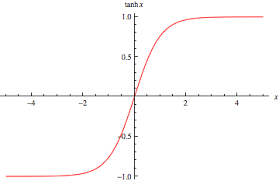

In [124]:
# The domain of the function is set to 
# (- ∞,+ ∞) and its counterdomain is set to the interval
# (-1,1). The function has a horizontal asymptote at y = -1 and y=1.
# Try to change the value of the function testTranferFunction = tanhFunction(x) , between '-709 an 709'
# with 'x' representing a positive or negative number and see the result by running the cell

def tanhFunction (soma):
  return (np.exp(soma) - np.exp(-soma)) / (np.exp(soma) + np.exp(-soma))

testTanhFunction = tanhFunction(709);
print(testTanhFunction)

1.0


Função ReLU - [Wikipedia ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))<br>
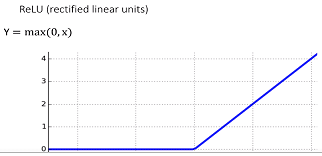

In [125]:
#ReLU function - Rectified linear units, compared to sigmoid function or similar activation functions,
# allow faster and effective training of deep neural architectures on large and complex datasets.
# Try to change the value of the function testTranferFunction = tanhFunction(x)
# with 'x' representing a positive or negative number and see the result by running the cell

def functionRelu(soma):
  if soma >= 0:
    return soma
  return 0

testReluFunction = functionRelu(-709);
print(testReluFunction)

0


Função Softmax - [SoftMax WikiPedia](https://en.wikipedia.org/wiki/Softmax_function)

In [126]:
def testSoftMaxFunction(x):
  exponencialSoftMaxTest = np.exp(x)
  return exponencialSoftMaxTest / exponencialSoftMaxTest.sum()

vectorValuesTestSoftMax =[5.0 , 7.0 , 1.3]
print('As probabilidades para os valores dos vetores',vectorValuesTestSoftMax , ' são: ',testSoftMaxFunction(vectorValuesTestSoftMax))

As probabilidades para os valores dos vetores [5.0, 7.0, 1.3]  são:  [0.11885265 0.87820889 0.00293846]


# Primeiro Projeto: Covertendo Celsius para Fahrenheit

Primeiro Projeto: Conversão de °C para °F <br>
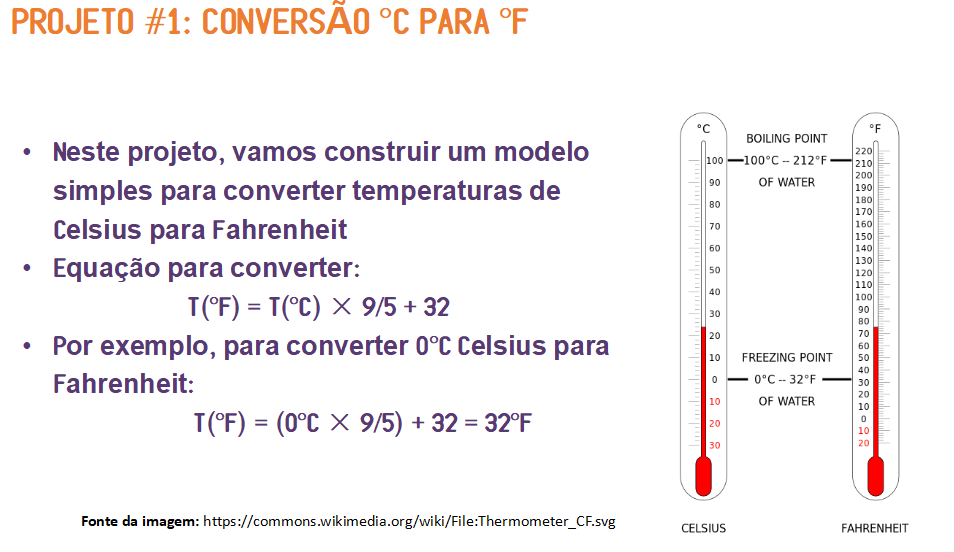

Etapa 1: Importando bibliotecas

In [127]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Etapa 2: Importando a base de dados

In [129]:
!wget https://github.com/cvs2010/udemyDeepLearning/raw/main/Celsius-to-Fahrenheit.csv

--2023-04-17 15:25:34--  https://github.com/cvs2010/udemyDeepLearning/raw/main/Celsius-to-Fahrenheit.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cvs2010/udemyDeepLearning/main/Celsius-to-Fahrenheit.csv [following]
--2023-04-17 15:25:34--  https://raw.githubusercontent.com/cvs2010/udemyDeepLearning/main/Celsius-to-Fahrenheit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263 [text/plain]
Saving to: ‘Celsius-to-Fahrenheit.csv.1’

Celsius-to-Fahrenhe 100%[===================>]     263  --.-KB/s    in 0s      

2023-04-17 15:25:34 (10.9 MB/s) - ‘Celsius-to-Fahrenheit.csv.1’ saved [263/2

In [130]:
temperature_df = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True)

In [131]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [132]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [133]:
temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


Celsius está em formato int64
Fahrenheint está no formato float64
Temos 30 dados de cada tipo e não temos dados Nulos (non-null)

In [134]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


Descrição dos dados

In [135]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


Etapa 3: Vizualização da base de dados

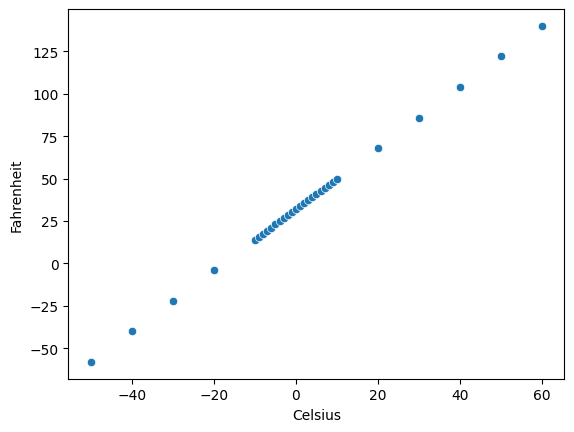

In [136]:
#sns.scatterplot(temperature_df['Celsius'], temperature_df['Fahrenheit']); atualizado 18/01/2021
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit']); # se inserir esse ';' no final o cabeçalho desaparece (try)

Etapa 4: Configuração da base de dados de treinamento

Criando as variáveis para treino

In [137]:
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

Mostrando a quantidade de dados inseridos em cada variávels,
para termos certeza que os dados foram inseridos corretamente

In [138]:
X_train.shape

(30,)

In [139]:
y_train.shape

(30,)

Etapa 5: Construção e treinamento do modelo

Construindo as camdas com a biblioteca keras

In [140]:
model = tf.keras.Sequential() # Criando sequencia de camadas
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1])) # 1 entrada e 1 saída com redes ligadas
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Compilando o modelo para treino com o algoritmo Adam , com learningRate=0.1 (quanto menor o learningRate menor as tentaivas serão dispersas, ou seja, menor variânica), utilizando
a função loss= Mean Square Error

In [148]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

Montando o algoritmo de treino EPOCAS de treinamento
(Execute 2 vezes o treinamento para ele chegar no fit correto)

In [149]:
epochs_hist = model.fit(X_train,
                        y_train,
                        epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 431ms/step - loss: 8.9584
Epoch 2/500
1/1 [==============================] - 0s 16ms/step - loss: 27.7952
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 7.9682
Epoch 4/500
1/1 [==============================] - 0s 19ms/step - loss: 10.1753
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 16.5390
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 12.8675
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 5.8812
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 2.6952
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 4.5087
Epoch 10/500
1/1 [==============================] - 0s 12ms/step - loss: 7.0549
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 6.5716
Epoch 12/500
1/1 [==============================] - 0s 14ms/step - loss: 3.6201
Epoch 13/500
1/1 [==========================

Etapa 5: Avaliação do modelo

Salvando o histporico das épocas de treinamento

In [150]:
epochs_hist.history.keys()

dict_keys(['loss'])

Gerando o gráfico de treinamento

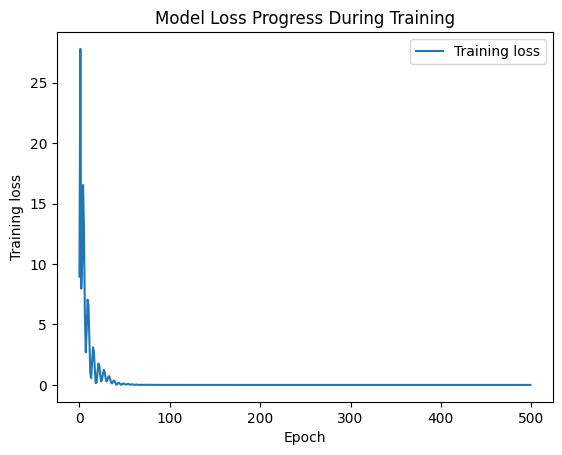

In [151]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

W1 = 1.8, BIAS = 32

In [152]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

Fazendo um predict de temperatura 10 em Celsius, resultado deverá ser 50 no array

In [153]:
temp_c = 10
temp_f = model.predict([temp_c])
temp_f

1/1 [==============================] - 0s 85ms/step


array([[50.]], dtype=float32)

Comprovando que o MachineLearning acertou através da fórmula de transformação de °C para °F

In [154]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

50.0